# Data-analytiikan osaaja

## Koulutus: 13.2.2020-14.2.2020

# Aihe: satunnaismetsäalgoritmit

In [1]:
# Tuo peruskirjastojen funktionaalisuutta:
import numpy as np
import pandas as pd

# Satunnaismetsäalgoritmit:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# scikit-learn -kirjastosta validointia varten 
from sklearn.model_selection import train_test_split

# scikit-learn -kirjastosta mallin arviointia varten
from sklearn import metrics

Lataa haluamasi data luokitteluongelmaa varten. Mahdollisia lähteitä on:
    https://scikit-learn.org/stable/datasets/index.html
    https://archive.ics.uci.edu/ml/index.php
tai oma data.

In [2]:
data = pd.read_csv('titanic.csv')

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(data['Sex'].unique()))

LabelEncoder()

In [4]:
data['Sex_categorical'] = le.transform(data['Sex'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
...     data.drop(['Survived', 'Name', 'Sex'], axis=1), data['Survived'], test_size=0.33, random_state=42)

In [6]:
# Luo satunnaismetsaobjekti (ei vielä oppimista):
metsa = RandomForestClassifier(n_estimators=10)

In [7]:
# Opitaan malli datasta:
metsa = metsa.fit(x_train, y_train)

In [8]:
# Tee ennustukset satunnaismetsällä:

ennustus_train = metsa.predict(x_train)
ennustus_test = metsa.predict(x_test)

virhe_train = metrics.accuracy_score(y_train, ennustus_train)
virhe_test = metrics.accuracy_score(y_test, ennustus_test)

print("Tarkkuus (opetus): {0}".format(virhe_train))
print("Tarkkuus (testaus): {0}".format(virhe_test))

Tarkkuus (opetus): 0.9696969696969697
Tarkkuus (testaus): 0.7918088737201365


In [9]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,20

from sklearn.tree import export_graphviz

estimator = metsa.estimators_[5]

export_graphviz(estimator, 
                out_file='metsa.dot', 
                feature_names = data.drop(['Survived', 'Name', 'Sex'], axis=1).columns,
                class_names = ['Died', 'Survived'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'metsa.dot', '-o', 'metsa.png', '-Gdpi=200'])

0

Tutki satunnaismetsäalgoritmin dokumentaatiota:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier 

Mitä lisäfunktionaalisutta löydät?

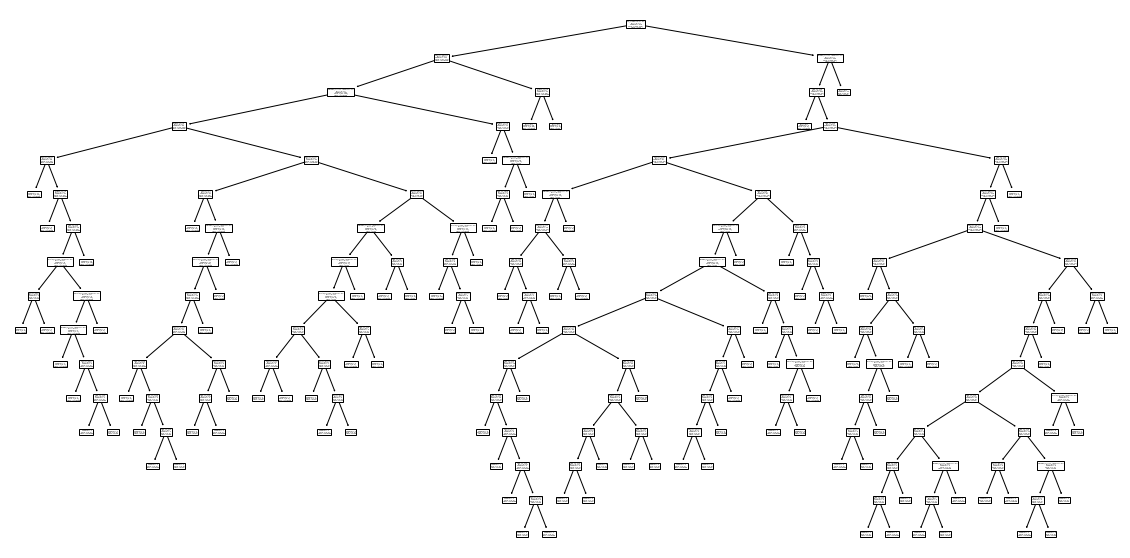

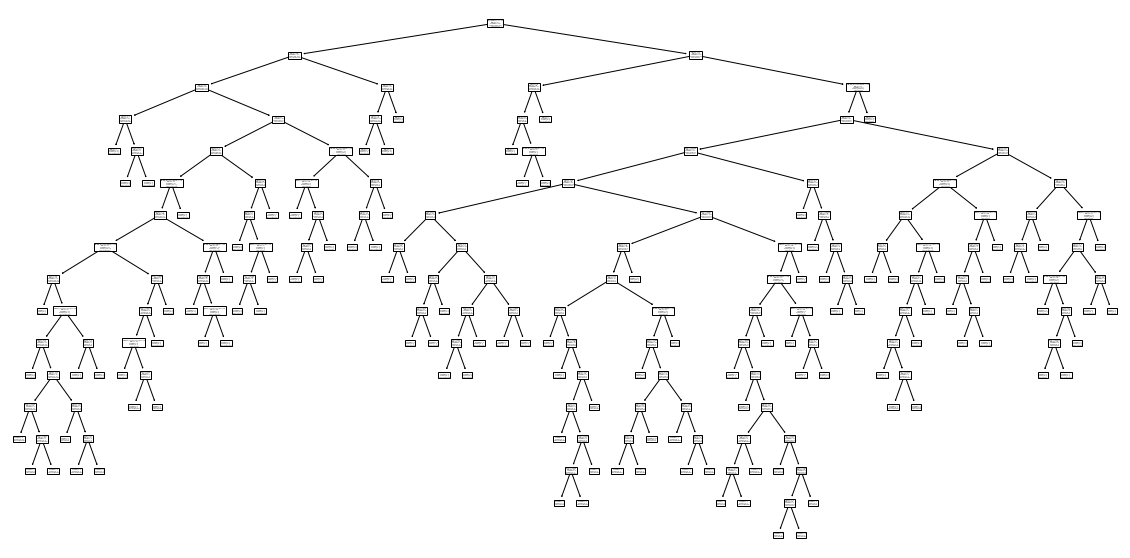

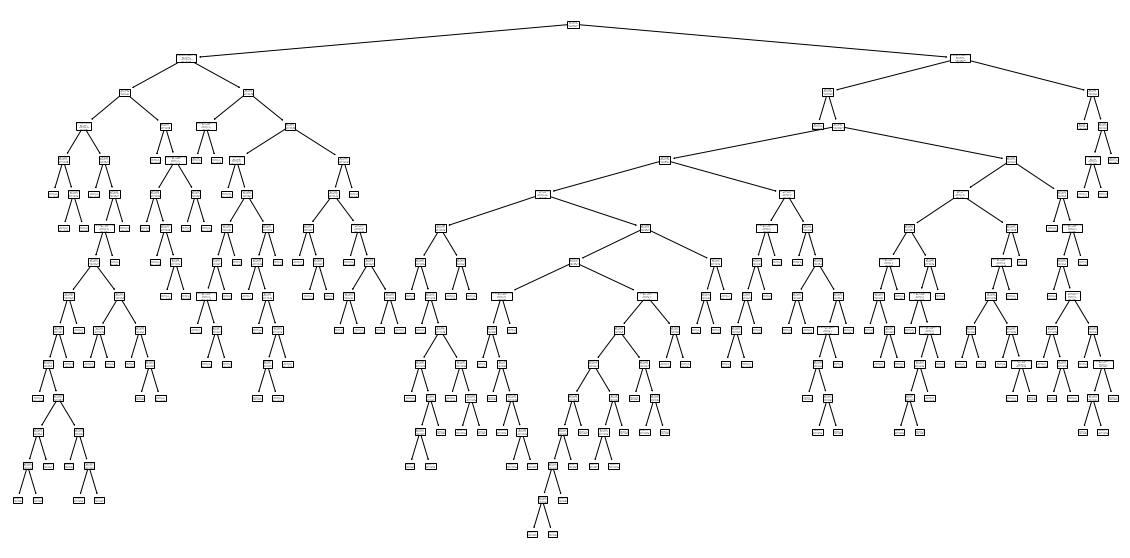

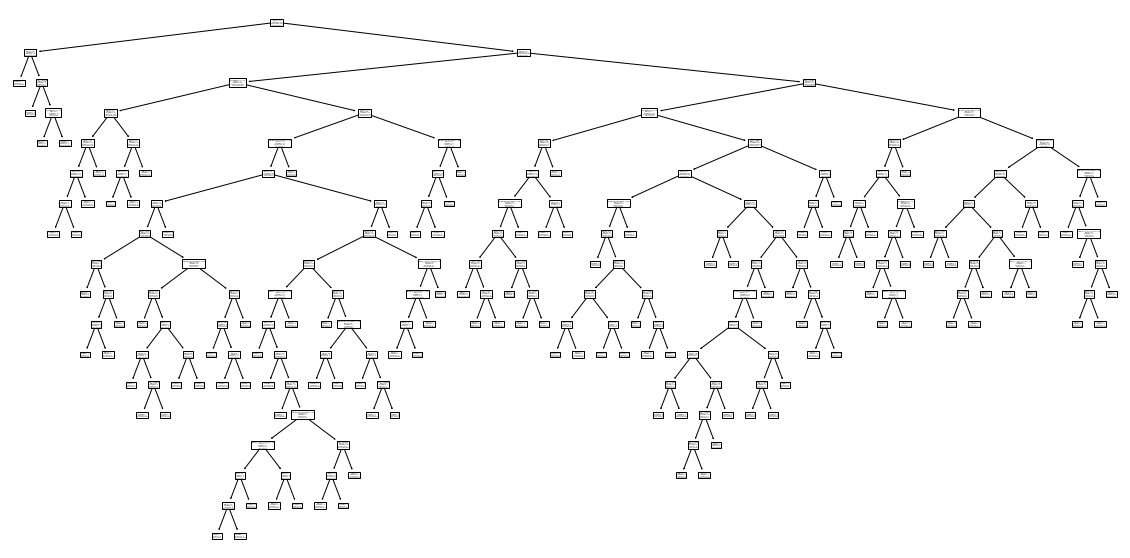

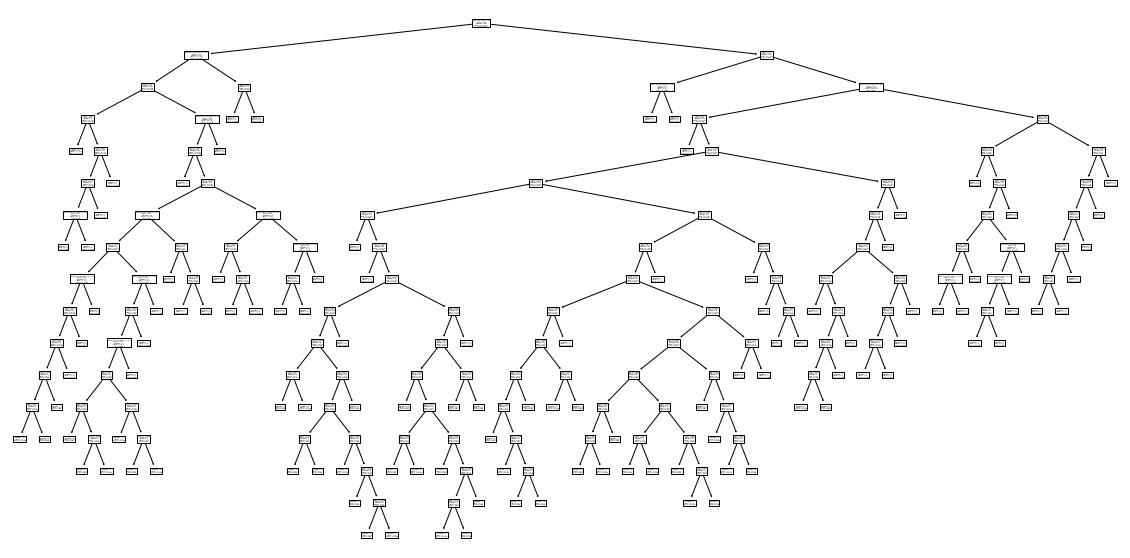

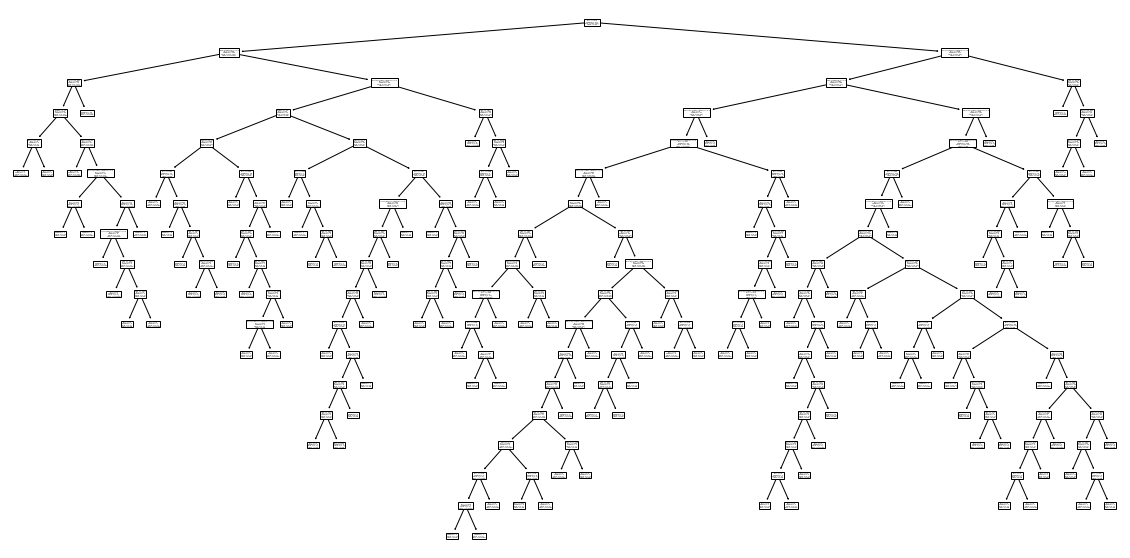

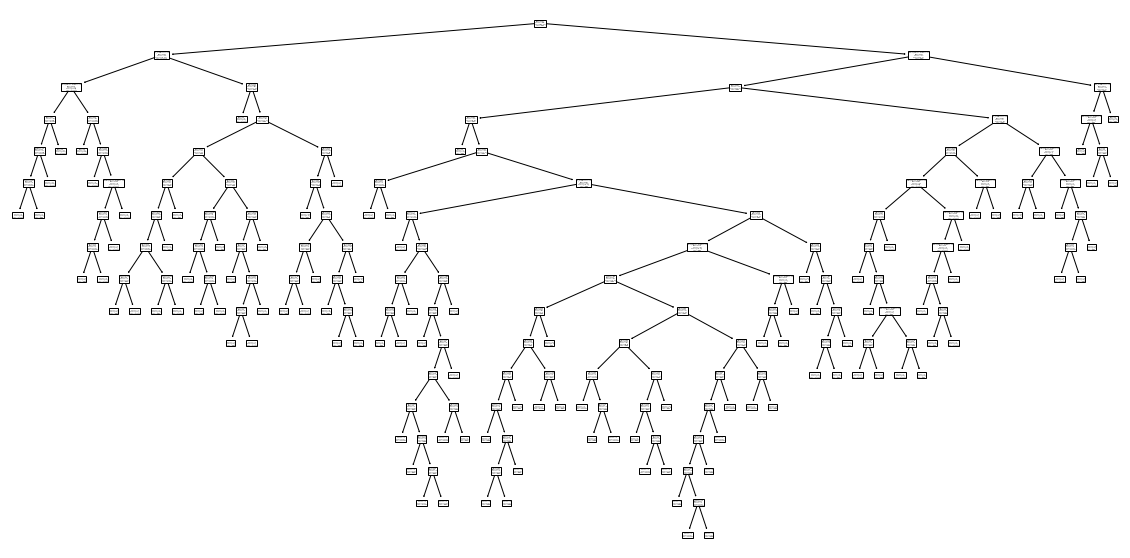

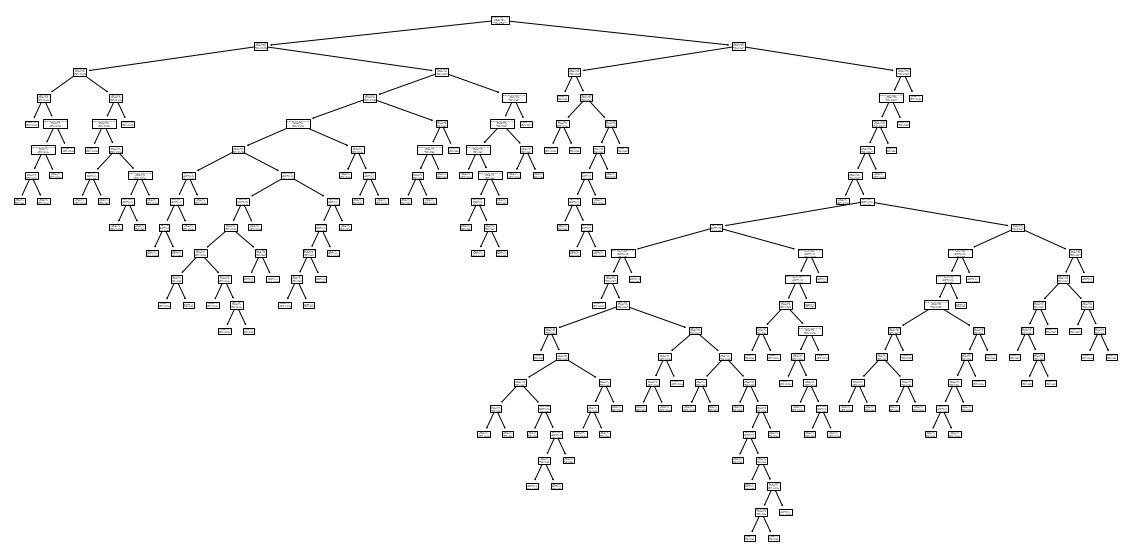

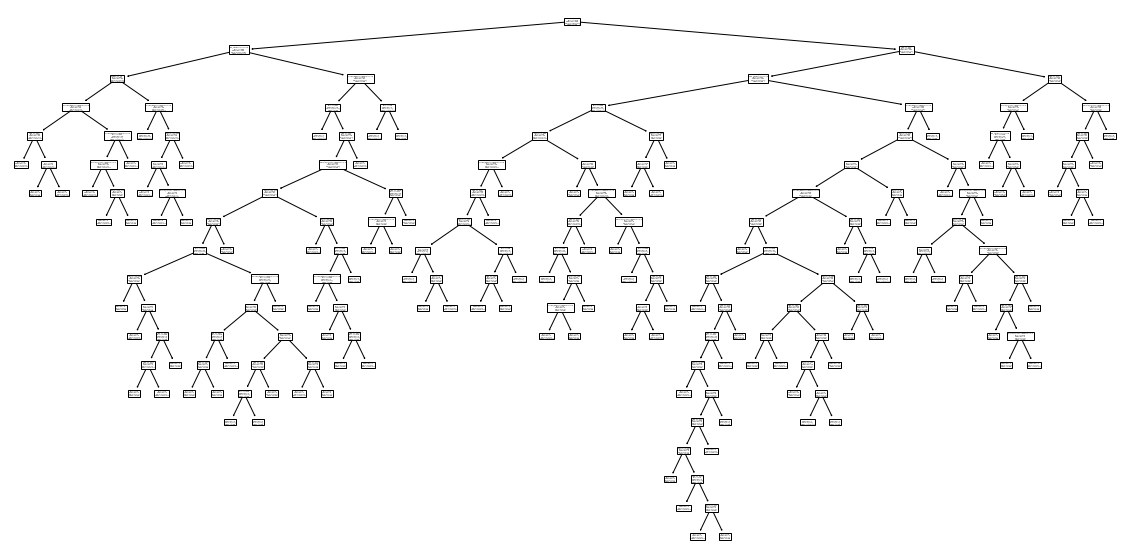

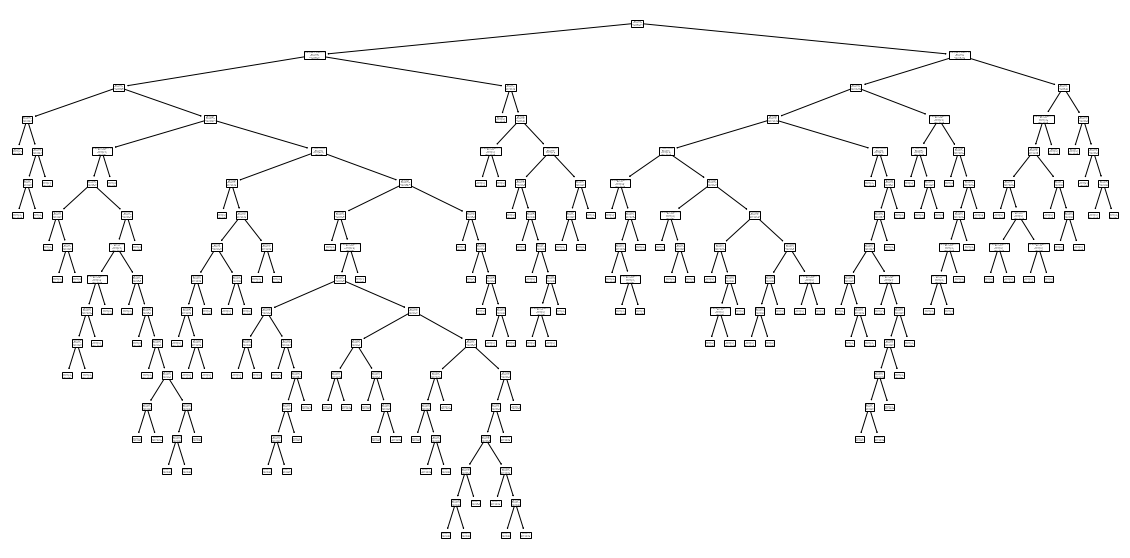

In [11]:
for i in range(0, 10):
    plt.figure(figsize=(20,10))
    tree.plot_tree(metsa.estimators_[i],
                   feature_names=data.drop(['Survived', 'Name', 'Sex'], axis=1).columns,
                   class_names=['Died', 'Survived'])
    plt.show()